# Домашнее задание по статистическому анализу на python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

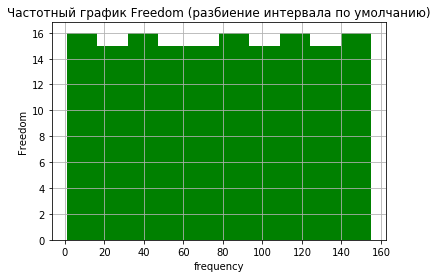

In [18]:
n, bins, patches = plt.hist(df['Freedom'], facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по умолчанию)')
plt.grid(True)
plt.show()

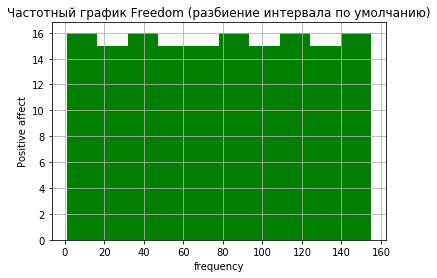

In [19]:
n, bins, patches = plt.hist(df['Positive affect'], facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom (разбиение интервала по умолчанию)')
plt.grid(True)
plt.show()

In [ ]:
'''Две крепостные стены в предыдущих блоках больше всего похожи
на примеры равномерного распределения с рядом отклоняющихся значений'''

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [50]:
Freedom = df['Freedom']
df1 = df.dropna()
Freedom1 = df1['Freedom']
PAffect1 = df1['Positive affect']

In [40]:
print('Медиана: ', statistics.median(df['Freedom']))
print('Медиана1: ', statistics.median(df1['Freedom']))

Медиана:  71.0
Медиана1:  79.5


In [41]:
print('Мода: ', statistics.mode(Freedom))
print('Мода1: ', statistics.mode(Freedom1))
'''функция mode делает логичный вывод, что по причине того, что каждое значение в столбце Freedom уникально, найти моду, 
т.е. наиболее распространённое значение, невозможно'''

StatisticsError: no unique mode; found 156 equally common values

In [42]:
print('Математическое ожидание:', statistics.mean(df['Freedom']))
print('Математическое ожидание1:', statistics.mean(df1['Freedom']))

Математическое ожидание: nan
Математическое ожидание1: 78.82857142857142


In [43]:
print('Стандартное отклонение:', statistics.pstdev(Freedom))
print('Стандартное отклонение1:', statistics.pstdev(Freedom1))

Стандартное отклонение: nan
Стандартное отклонение1: 44.9475794449399


In [44]:
print('Дисперсия', statistics.pvariance(Freedom))
print('Дисперсия1', statistics.pvariance(Freedom1))

Дисперсия nan
Дисперсия1 2020.2848979591836


In [ ]:
'''В предыдущих трёх блоках пришлось убрать NaN (собственно, тот самый выброс, который мы находим на блок ниже), чтобы получить
адекватные значения'''

In [30]:
print('Минимум', min(Freedom))

Минимум 1.0


In [31]:
print('Максимум', max(Freedom))

Максимум 155.0


In [32]:
Freedom.isnull().sum()

1

In [33]:
print('Размах:', (max(Freedom) - min(Freedom)))

Размах: 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

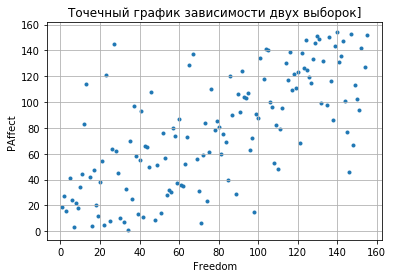

In [52]:
plt.xlabel('Freedom')
plt.ylabel('PAffect')
plt.title('Точечный график зависимости двух выборок]')
plt.grid(True)
plt.scatter(Freedom1, PAffect1, marker='.')

In [46]:
from scipy.stats import pearsonr

In [51]:
corr, p_value = pearsonr(Freedom1, PAffect1)
print(corr)
'''знак значения корреляции указывает на то что она положительная, т.е. при возрастании значений одной переменной (Уровень свободы)
растут значения другой переменной (Положительное воздействие)'''

0.6965670458090686


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [55]:
freedom = df1['Freedom']
print(statistics.mean(freedom))

78.82857142857142


In [56]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

6.496390726949487e-15


In [57]:
min(freedom_1)

-77.82857142857142

In [58]:
max(freedom_1)

76.17142857142858

In [59]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

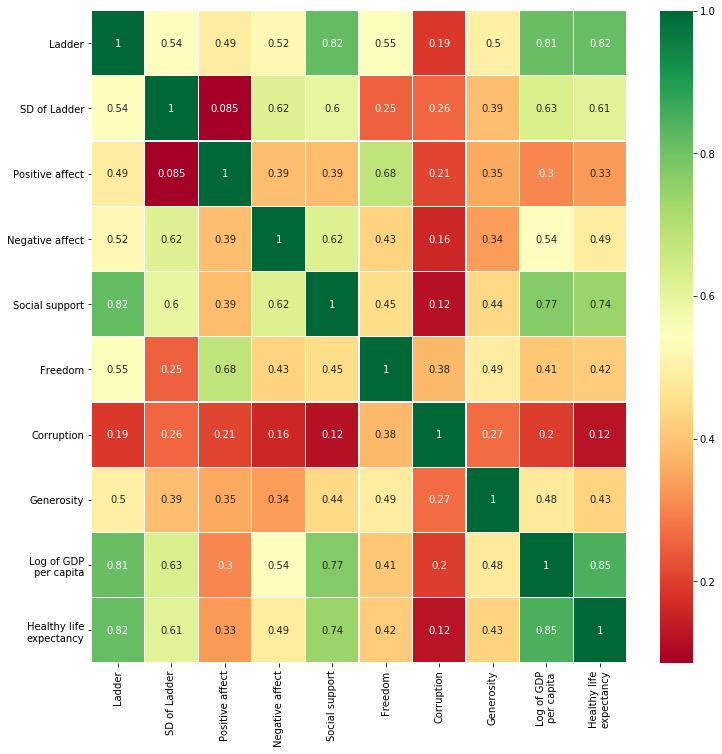

In [60]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

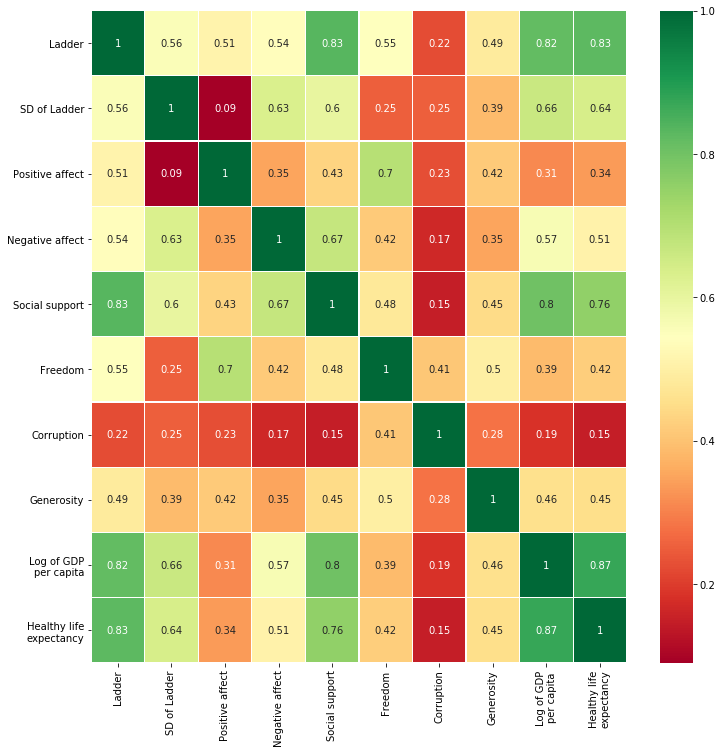

In [61]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [63]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df2=pd.read_csv(url)
df2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

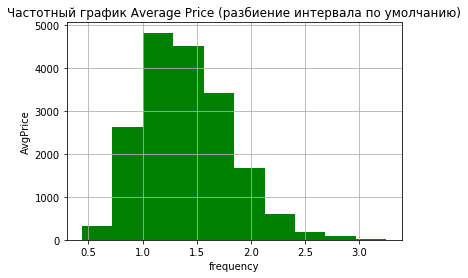

In [64]:
n, bins, patches = plt.hist(df2['AveragePrice'], facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AvgPrice')
plt.title('Частотный график Average Price (разбиение интервала по умолчанию)')
plt.grid(True)
plt.show()

In [ ]:
'''Average Price - нормальное распределение, смещенное влево'''

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [65]:
Av4046 = df2['4046']
AvgPrice = df2['AveragePrice']
corr, p_value = pearsonr(Av4046, AvgPrice)
print(corr)
'''Отрицательная корреляция - чем меньше значение проданных авокадо 4046, тем больше средняя стоимость. 
Правда, уровень корреляции небольшой (0.2), так что вряд ли этот сорт авокадо в скором времени престанут продавать'''

-0.20831704848788477
